# Introduction -- Reminder

Each Python lab will start with a pre-flight exercise that walks through building some of the set up and tools ($\sim$ 30 min), followed by an in-class tutorial with time for Q+A (50 min) so you can walk through steps that will be necessary for the homework assignment you will submit ($\sim$ 3 hrs).  Each lab will contain starter code, similar to what you see below.  Please fill in the code to complete the pre-flight assignment in preparation for the in-class tutorial.  

Preflight ($\sim$30-60 min, 10 points) **Typically due: Wednesdays 3pm EST**

*Preflight typically graded by Wednesday 5p EST*

In-class tutorial and Q+A ($\sim$ 50 min, 10 points) **Typically occurs: Thursdays 9am EST**

Homework assignment ($\sim$ 3-5 hrs, 30 points) **Typically due: Mondays 9am EST** 

*Homework typically graded by Thursday 5p*

When we grade your homework, we will not run your code. Once submitted, your notebook should have the outputs for all of your results.  Please do not include long outputs from debugging, beyond a few print statements and the requested visualizations (i.e. plots).

**Grading:** When we grade your notebook, we will convert the .ipynb file to an HTML file.  We will be using [nbgrader](https://nbgrader.readthedocs.io/en/stable/) to grade your notebooks.  **Note:** If your ```IPython``` version is too old, we will *not* be able to grade your assignments.


# Phys 260 Python Preflight 9: Review of time integration in circuits  (10 points total)

## Preflight Summary
- Brief review of time integration in circuits with a more complex case (preparing for RLC circuits)

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Brief Review of Numerically Solving Circuits

Most simple circuits can be solved using a variety of techniques.  As circuits become more complicated, or as the signals the circuits are processing become more complicated, finding an exact solution can become more difficult.  

We learned in class that
\begin{equation}
I = \frac {dQ} {dt}
\end{equation}

This simple definition implies that many circuits can be expressed in the language of differential equations. The purpose of this assignment is to learn how to solve these equations numerically. 

Consider a first-order equations of the form:
\begin{equation}
\frac {dx} {dt} = f(x,t).
\end{equation}

The solution to this equation is a function $x(t)$ whose first derivative is $f$.
To find the solution to such an equation, we also need boundary conditions, or starting points.  Suppose that we have a first-order differential equation and know the value of $x$ for some specific time $t$, that is we know $x(t)$.  The we can write the value of x some short time later as
\begin{equation}
x(t+h) = x(t) + h \frac {dx} {dt} + \frac 1 2 h^2 \frac {d^2x} {dt^2} + ...
\end{equation}

\begin{equation}
x(t+h) = x(t) + h f(x,t) + h^2 \frac {df(x,t)} {dt} + ...
\end{equation}

If $h$ is small then $h^2$ is really small, and we can ignore it, and all higher terms of $h^n$.  This technique is called **Euler's method**.

Using this, if we know the value of $x$ at some time $t$ we can find the value at some short time later.  We can then repeat this process and understand how $x$ changes over time. The set of $x$ values at a discrete set of $t$ values is the numerical solution to our differential equation.

We also saw a more accurate method for time integration, called the **Runge-Kutta method**.



**Preflight**
- Numerically solving a more complex RC circuit

### A more complex RC circuit

In the problems above, you considered a simple $RC$ circuit. Now consider something a little more complicated:
<img src="http://www-personal.umich.edu/~gerdes/img/RC_1.jpg" height="400" width="400">

You have seen circuits like this as written homework problems, and determined the time constant for charging the capacitor. Your task now is to model this circuit numerically using the same techniques as you did for the simple $RC$ circuit from Tutorial/HW 6. We will assume the values of the components are all known, and that the capacitor is uncharged at $t=0$. You wil need to find the charge $Q$ on the capacitor, and the three currents $I_1$, $I_2$, and $I_3$, as a function of time.  

### Using LaTeX: Equations of motion (2 points)

Using Kirchhoff's rules we can write down four linearly independent equations involving the three unknowns $Q$, $I_1$, $I_2$, and $I_3$,
\begin{eqnarray}
I_3&=&\left(I_2R_2 + \frac{Q}{C}\right)/R_3 \;\;\;(1)\\
I_2&=& \left(V - \frac{I_1}{R_1} - \frac{Q}{C}\right)/R_2 \;\;\;(2) \\  
I_1&=&  I_{2}+ I_{3} \;\;\;(3)  \\
\end{eqnarray} 
and, with the new $I_2=\frac{dQ}{dt}$, we know what to add to calculate the Q at the next timestep.  Thus, we have the relationships to update each $I$ and $Q$.  You will notice that we have written this in the order such that the current at the next timestep, i+1 step, depends on values from the previous timestep, ith step, (e.g. $I_{3,i+1}=I_{3,i+1}(I_{2,i},Q_{i})$).

Show, in the next cell, how we arrive at these relationships.

<b>One solution:</b>
Starting with an inner left loop and the outermost loop, and the junction rule just before $R_2$, we have:
\begin{eqnarray}
V &=& I_1R_1 + I_2R_2 +\frac{Q}{C}\;\;\;(1a)\\
V &=& I_1R_1 + I_3R_3\;\;\;(2a)\\
I_1&=&I_2+I_3\;\;\;(3a)
\end{eqnarray}

Subtracting (1a) from (2a), we get the expression for $I_3=I_3(I_2, Q,const)$.  We can plug $I_3$ into (2a) to get $I_2=I_2(I_1,Q,const)$.

### Using LaTeX: Initial conditions (2 points)

Write down the four initial conditions of what you want to solve for: the current in each of the three branches and the charge.  *Hint:* First write down the $R_{eq}$ at $t=0$ when the uncharged capacitor acts as a wire, and you can write down initial currents in terms of $R_{eq}$.  

**Solution:** At $t=0$, the capacitor acts like a wire, and the circuit looks like the resistor $R_1$ in series with the parallel combination of $R_2$ and $R_3$. Thus, $R_{eq}(t=0) = R_1 + R_2R_3/(R_2 + R_3)$. So our initial conditions are:
\begin{eqnarray}
I_1 & = & V/R_{eq} \\
I_2 & = & \frac{V}{R_{eq}}\frac{R_3}{R_2 + R_3}\\
I_3 & = & \frac{V}{R_{eq}}\frac{R_2}{R_2 + R_3} \\
Q & = & 0
\end{eqnarray}

#### Define a class that models the complex RC circuit (3 points)

Fill out the class below, `RCCircuitComplex`.  You will want to also define the characteristic timescale, `self.tau`, defined as $\tau=(R_2 + R_1R_3/(R_1 + R_3))C$ ($R_2$ is in series with the capacitor, and $R_1$ and $R_3$ branch off in parallel from the current in the capacitor).

In [121]:
class RCCircuitComplex :
    """ Models the more complex RCCircuit with three branches
    """
    def __init__(self, r1, r2, r3, capacitance, q_capacitor, voltage_battery) :
        """
        Parameters
        ----------
        r1 : float
            value of resistance in ohms
        r2 : float
            value of resistance in ohms
        r3 : float
            value of resistance in ohms
        capacitance : float 
            value of capacitance in Farads
        q_capacitor : float
            initial charge on capacitor
        voltage_battery : float
            voltage across battery
        """
        
        # Set, as attributes, constants of the problem (including self.tau, the equivalent to the rc_constant)
        ### BEGIN SOLUTION 
        self.r1 = r1
        self.r2 = r2
        self.r3 = r3
        self.capacitance = capacitance
        self.voltage_battery = voltage_battery
        self.r_equivalent = r1+r2*r3/(r2+r3)
        # The time constant is a characteristic timescale of the system, analogous to the period in a spring
        self.tau = (r2 + r1*r3/(r1 + r3))*self.capacitance#self.r_equivalent * self.capacitance
        ### END SOLUTION
        
        # Use initial conditions to set the "now" values of the problem as attributes
        ### BEGIN SOLUTION
        self.q_now = q_capacitor
        self.i1_now = voltage_battery / self.r_equivalent
        self.i2_now = self.i1_now * self.r3 / (self.r2+self.r3)
        self.i3_now = self.i1_now * self.r2 / (self.r2+self.r3)
        ### END SOLUTION
        
        # Initialize the current, charge, and timesteps
        self.i1_vals = []
        self.i2_vals = []
        self.i3_vals = []
        self.q_vals = []
        self.timesteps = np.array([]) 

    def _set_now_vals(self) :
        """Calculate "now" current and capacitor charge in terms of other attributes, setting attributes"""
        ### BEGIN SOLUTION
        vcap = self.q_now/self.capacitance
        vr2 = self.i2_now*self.r2
        vr1 = self.i1_now*self.r1

        self.i3_now = (vr2 + vcap)/self.r3
        self.i2_now = (self.voltage_battery - vr1 - vcap)/self.r2
        self.i1_now = self.i2_now+self.i3_now

        self.q_now += self.i2_now * self.dt
        ### END SOLUTION
                
    def _set_timesteps(self, num_timescales, num_timesteps_per_timescale) :        
        """Internal method. Sets the attributes num_timesteps and dt.
        Parameters
        ----------
        num_timescales : floattimestep 
            number of timescales to evolve over
        num_timesteps_per_timescale : int
            number of timesteps per characteristic timescale, defines the time resolution 
        """
        
        self.dt = self.tau / num_timesteps_per_timescale
        print(self.dt)

        next_timesteps = np.arange(0, self.tau * num_timescales, self.dt)
        print('next_timesteps shape: ',next_timesteps.shape)
        try :
            last_timestep = self.timesteps[-1]
            next_timesteps += last_timestep
            self.timesteps = np.concatenate([self.timesteps, next_timesteps])
            
        except IndexError : 
            self.timesteps = next_timesteps        

    def evolve_circuit(self, num_timescales, num_timesteps_per_timescale) :
        """Evolve the spring, populate the acceleration, velocity and position (a_vals, v_vals, x_vals)
        Parameters
        ----------
        num_periods : float
            number of periods to evolve over
        num_timesteps_per_period : int
            number of timesteps per period, defines the time resolution         
        """
        
        self._set_timesteps(num_timescales, num_timesteps_per_timescale)

        # Time evolve the circuit using self._set_now_vals() and store values at each timestep
        ### BEGIN SOLUTION
        for timestep in np.arange(0, self.tau * num_timescales, self.dt) :
            # Populate i_vals and q_vals with current current and charge on capacitor
            self.i1_vals.append(self.i1_now)
            self.i2_vals.append(self.i2_now)
            self.i3_vals.append(self.i3_now)
            self.q_vals.append(self.q_now)
            
            # Update "now" values: q_now, and i_now (i_now can be updated with a method)
            self._set_now_vals()             
        ### END SOLUTION

### Plot the model (1 points)

Plot the model for this circuit with the following circuit components:
* $V = 10$ V
* $R_1 = 10~\Omega$
* $R_2 = 20~\Omega$
* $R_3 = 15~\Omega$
* $C = 1.0~\mu$F

I recommend you time evolve over 5 characteristic timescales, and plot with time in units of $\tau$.  Full credit for making the following plots:
* $I_1$, $I_2$, and $I_3$ vs. time
* Voltage on $C$ vs. time

0.5384615384615385 0.2307692307692308 0.3076923076923077
2.6e-07
next_timesteps shape:  (500,)


Text(0.5, 0, 'Time [Units of $\\tau$]')

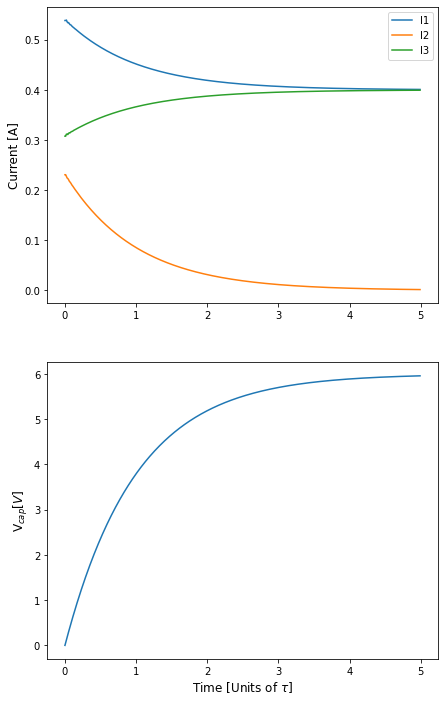

In [127]:
#  Define an instance of RCCircuitComplex, time evolve, and plot

### BEGIN SOLUTION
rccc = RCCircuitComplex(10, 20, 15, 1e-06, 0, 10)
print(rccc.i1_now, rccc.i2_now, rccc.i3_now)
rccc.evolve_circuit(5,100)

# Plotting: 
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(7,12))
ax1.plot(rccc.timesteps/rccc.tau, rccc.i1_vals, label='I1')
ax1.plot(rccc.timesteps/rccc.tau, rccc.i2_vals, label='I2')
ax1.plot(rccc.timesteps/rccc.tau, rccc.i3_vals, label='I3')
ax1.set_ylabel('Current [A]',fontsize='large')
ax2.plot(rccc.timesteps/rccc.tau, np.array(rccc.q_vals)/rccc.capacitance)
ax2.set_ylabel('V$_{cap} [V]$', fontsize='large')
ax1.legend()
ax2.set_xlabel('Time [Units of $\\tau$]', fontsize='large')
### END SOLUTION

### Discuss the plot (1 point)

In the markdown cell below, discuss your plots.  For example, relate how the currents evolve over time.  For the voltage across the capacitor, does the asymptotal behavior make sense?  The time constant is defined as the amount of time to reach one e-folding time ($\approx$2.718).  When does the capacitor reach (1-e) of its final charge (or voltage)?  Does this make sense?

In the first panel, we see that $I_2$ drops to zero over time as the capacitor charges up. As $I_2$ drops to 0, $R_1$ and $R_3$ are effectively in series.  The currents in these resistors therefore approach the same value.  A long time after the capacitor has been charged, current flows only through the series combination of $R_1$ and $R_3$. In this case, the current from the battery is $I = V/(R_1 + R_3)$, and the voltage drop across the capacitor is 
$V_C = V - IR_1 = 10\left( 1 - \frac{R_1}{R_1 + R_3}\right) = 6~V.$ This agrees with the plot above.

Also, we see that $V(t=\tau) = 6/(e - 1)$.

### Plot a loop rule (1 point)

Choose one of the loops in the "more complex circuit".  Plot the sum of the voltage drops in this loop. You will notice that it does not quite stay at zero due to time integration errors.

Text(0, 0.5, 'Sum of voltage drops')

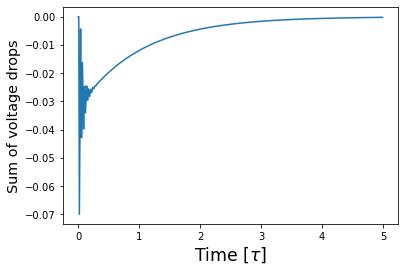

In [137]:
# Plot loop rule here
### BEGIN SOLUTION
plt.plot(rccc.timesteps/rccc.tau, 
         rccc.voltage_battery - rccc.r1 * np.array(rccc.i1_vals) - rccc.r3 * np.array(rccc.i3_vals))
plt.xlabel('Time [$\\tau$]', fontsize='xx-large')
plt.ylabel('Sum of voltage drops',fontsize='x-large')
### END SOLUTION